In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("glotempcity.csv", parse_dates=["dt"])
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [14]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [15]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [16]:
data.shape

(8599212, 7)

In [17]:
data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [18]:
data.isna().sum()/data.shape[0]*100

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [19]:
data_pre = data.dropna()

In [20]:
data_pre.shape

(8235082, 7)

In [21]:
data_pre.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [22]:
data_pre.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [23]:
data_pre["Country"].value_counts()

India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: Country, Length: 159, dtype: int64

In [24]:
data_pre[(data_pre["Country"] == "Turkey") | (data_pre["Country"] == "Norway")] 

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [25]:
data_pre[(data_pre["Country"] == "Turkey") & (data_pre["AverageTemperature"]>20)] 

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
3318,1750-06-01,20.183,1.685,Çorlu,Turkey,40.99N,27.69E
3319,1750-07-01,24.420,1.603,Çorlu,Turkey,40.99N,27.69E
3320,1750-08-01,23.217,1.692,Çorlu,Turkey,40.99N,27.69E
3330,1751-06-01,21.248,1.740,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585419,2012-06-01,20.797,0.353,Zonguldak,Turkey,40.99N,31.95E
8585420,2012-07-01,23.516,0.298,Zonguldak,Turkey,40.99N,31.95E
8585421,2012-08-01,21.869,0.767,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [26]:
data_pre[data_pre["Country"].isin(["Turkey","Norway","Australia"])]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [27]:
data_selected = data_pre[data_pre["Country"].isin(["Turkey","Norway","Australia"])]

In [28]:
data_selected["Country"].value_counts()

Turkey       147086
Australia     28145
Norway        12664
Name: Country, dtype: int64

In [29]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [30]:
data_selected.groupby(by= "Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Australia,16.701462,0.605141
Norway,3.612553,1.741349
Turkey,12.951888,1.275864


In [31]:
data_selected.groupby(by= "Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Australia,2013-08-01,28.575,5.551,Wollongong,42.59S,153.64E
Norway,2013-08-01,18.048,14.483,Trondheim,63.49N,9.73E
Turkey,2013-08-01,32.885,9.237,Çorum,42.59N,42.71E


In [32]:
data_selected.groupby(by= "Country").agg(["min","mean","max"])

AverageTemperature                    AverageTemperatureUncertainty  \
                         min       mean     max                           min   
Country                                                                         
Australia              2.720  16.701462  28.575                         0.058   
Norway               -15.099   3.612553  18.048                         0.096   
Turkey               -15.353  12.951888  32.885                         0.056   

                             
               mean     max  
Country                      
Australia  0.605141   5.551  
Norway     1.741349  14.483  
Turkey     1.275864   9.237

In [33]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [34]:
tr_avg_temps = data_selected[data_selected["Country"] == "Turkey"]["AverageTemperature"]
no_avg_temps = data_selected[data_selected["Country"] == "Norway"]["AverageTemperature"]
aus_avg_temps = data_selected[data_selected["Country"] == "Australia"]["AverageTemperature"]

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

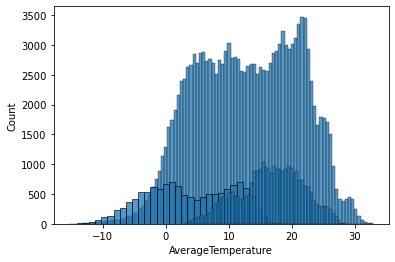

In [36]:
sns.histplot(tr_avg_temps) # displot veya histplot olarak yazabilirsin.
sns.histplot(no_avg_temps)
sns.histplot(aus_avg_temps)

In [37]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [38]:
data_selected["Country"].value_counts().index

Index(['Turkey', 'Australia', 'Norway'], dtype='object')

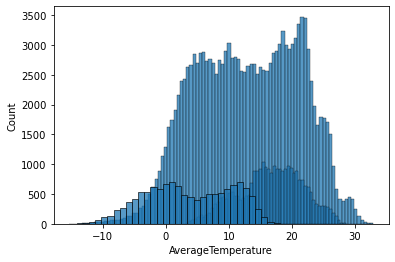

In [39]:
ulkeler = data_selected["Country"].unique()

for ulke in ulkeler:
      sns.histplot(data_selected[data_selected["Country"] == ulke]["AverageTemperature"])

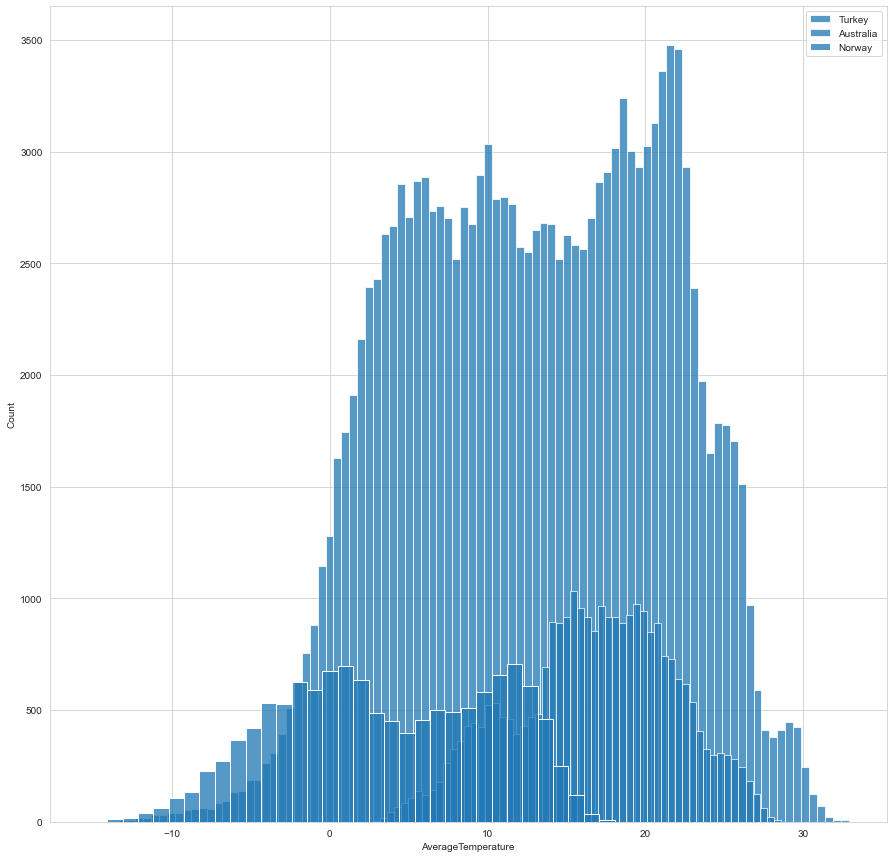

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
ulkeler = data_selected["Country"].unique()

for ulke in ulkeler:
      sns.histplot(data_selected[data_selected["Country"] == ulke]["AverageTemperature"])
        
plt.legend(ulkeler)

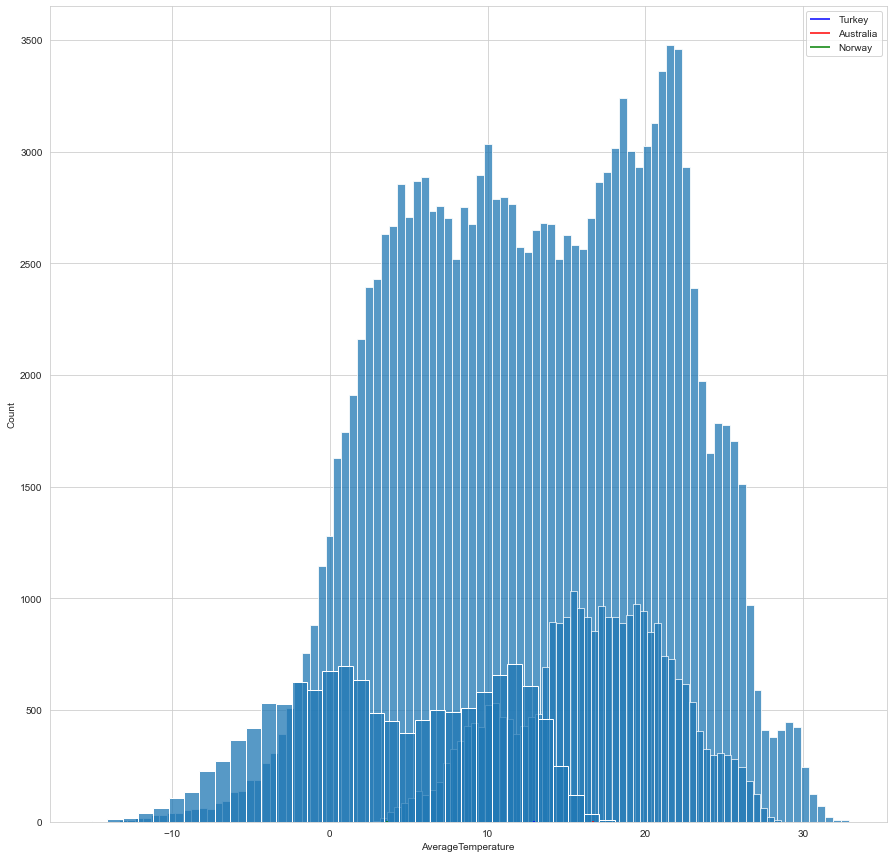

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
ulkeler = data_selected["Country"].unique()
colors = ["blue","red","green"]

for color, ulke in zip(colors,ulkeler):
        sns.histplot(data_selected[data_selected["Country"] == ulke]["AverageTemperature"])
        ulke_mean = data_selected[data_selected["Country"] == ulke]["AverageTemperature"].mean()
        plt.vlines(ulke_mean, 0, 2.00, colors=color)
plt.legend(ulkeler)

# Tam Otomatikleştirme

In [42]:
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

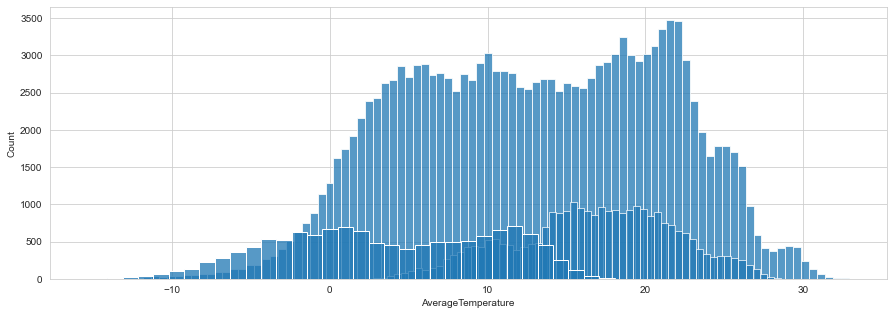

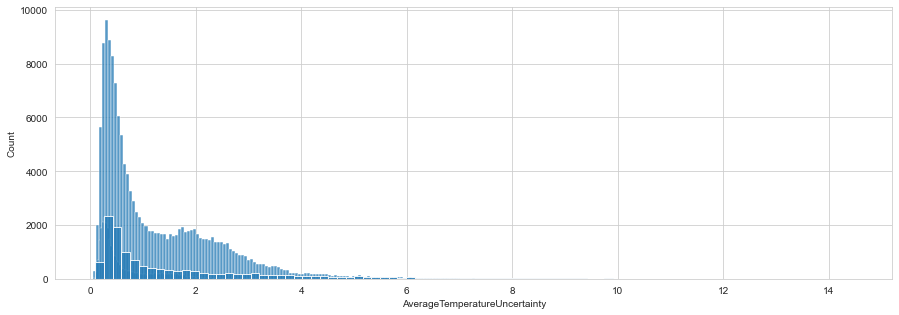

In [43]:
kolonlar = data_selected.columns[1:3]
ulkeler = data_selected["Country"].unique()
#mplt.figure(figsize=(15,5))
for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    for ulke in ulkeler:
                sns.histplot(data_selected[data_selected["Country"] == ulke][kolon])
plt.show()

# scatterplot

In [44]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [45]:
tr_data = data_selected[(data_selected["Country"]=="Turkey") & (data_selected["dt"] > "1990")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6194,1990-02-01,6.354,0.441,Çorlu,Turkey,40.99N,27.69E
6195,1990-03-01,9.255,0.259,Çorlu,Turkey,40.99N,27.69E
6196,1990-04-01,12.533,0.275,Çorlu,Turkey,40.99N,27.69E
6197,1990-05-01,15.497,0.347,Çorlu,Turkey,40.99N,27.69E
6198,1990-06-01,20.209,0.384,Çorlu,Turkey,40.99N,27.69E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

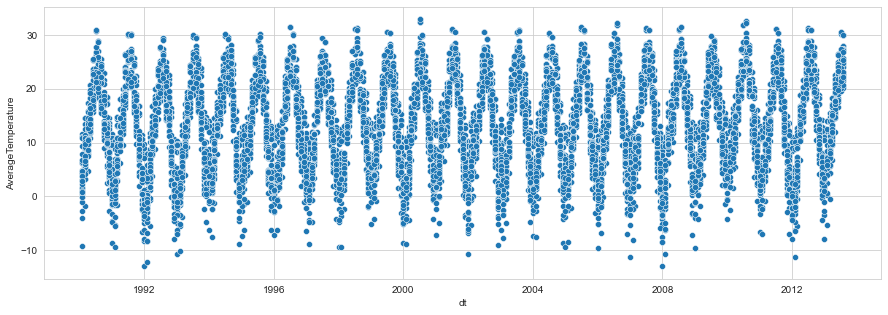

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature", data=tr_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

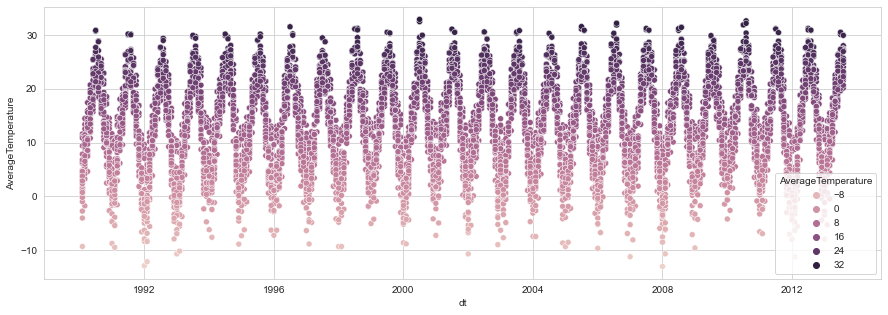

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature", data=tr_data, hue= "AverageTemperature")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

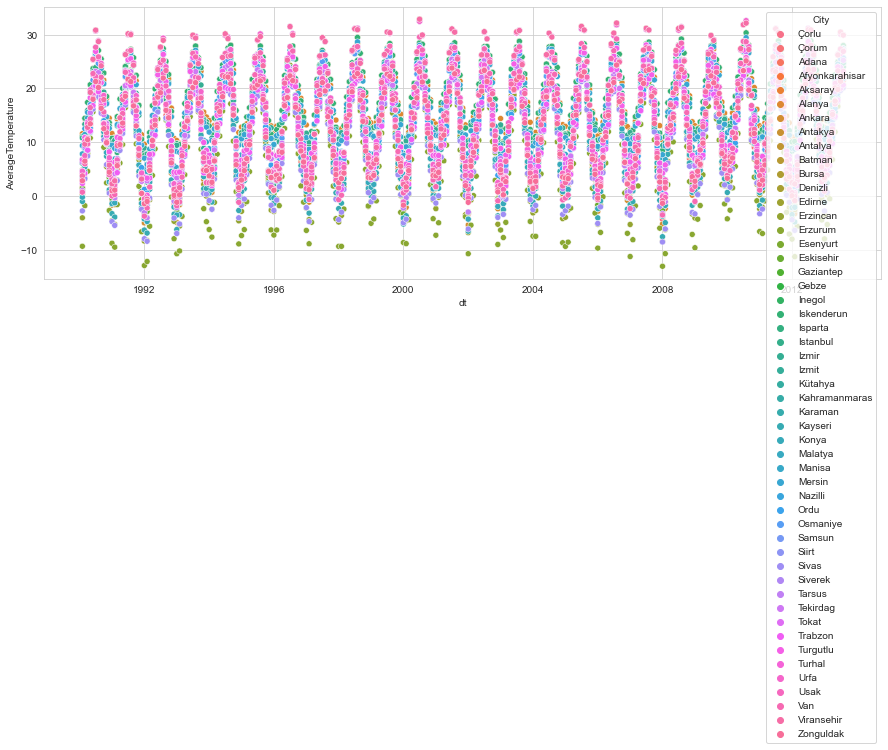

In [48]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature", data=tr_data, hue= "City")

In [49]:
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6194,1990-02-01,6.354,0.441,Çorlu,Turkey,40.99N,27.69E
6195,1990-03-01,9.255,0.259,Çorlu,Turkey,40.99N,27.69E
6196,1990-04-01,12.533,0.275,Çorlu,Turkey,40.99N,27.69E
6197,1990-05-01,15.497,0.347,Çorlu,Turkey,40.99N,27.69E
6198,1990-06-01,20.209,0.384,Çorlu,Turkey,40.99N,27.69E


In [50]:
tr_data_means = tr_data.groupby(pd.to_datetime(tr_data['dt'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
).mean() 
tr_data_means = tr_data_means.reset_index()
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             283 non-null    object 
 1   AverageTemperature             283 non-null    float64
 2   AverageTemperatureUncertainty  283 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.8+ KB


In [51]:
tr_data_means["dt"] = tr_data_means["dt"].astype("datetime64")

In [52]:
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             283 non-null    datetime64[ns]
 1   AverageTemperature             283 non-null    float64       
 2   AverageTemperatureUncertainty  283 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.8 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

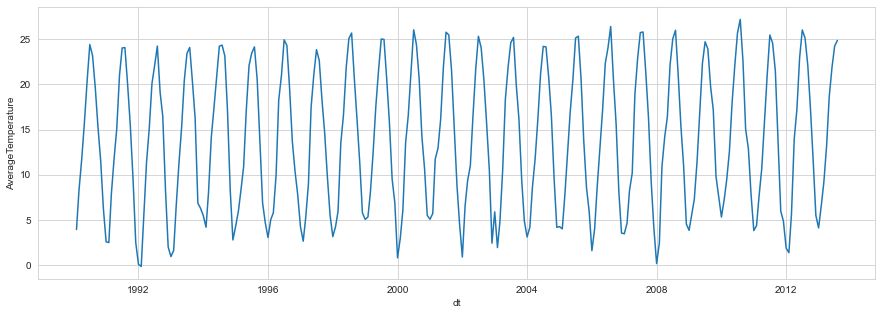

In [53]:
plt.figure(figsize=(15,5))
sns.lineplot(x="dt", y="AverageTemperature", data=tr_data_means)

In [ ]:
## 3 ülke için yapacağız

In [54]:
data_1990 = data_selected[(data_selected["dt"] > "1990")]
data_1990.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6194,1990-02-01,6.354,0.441,Çorlu,Turkey,40.99N,27.69E
6195,1990-03-01,9.255,0.259,Çorlu,Turkey,40.99N,27.69E
6196,1990-04-01,12.533,0.275,Çorlu,Turkey,40.99N,27.69E
6197,1990-05-01,15.497,0.347,Çorlu,Turkey,40.99N,27.69E
6198,1990-06-01,20.209,0.384,Çorlu,Turkey,40.99N,27.69E


In [72]:
data_mean = data_1990.groupby(["Country", pd.to_datetime(data_1990['dt'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
]).mean() 
data_means = data_mean.reset_index()
data_means["dt"] = data_means["dt"].astype("datetime64")
data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        849 non-null    object        
 1   dt                             849 non-null    datetime64[ns]
 2   AverageTemperature             849 non-null    float64       
 3   AverageTemperatureUncertainty  849 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 26.7+ KB


In [66]:
data_means

,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,Australia,1990-02-01,21.248929,0.222357
1,Australia,1990-03-01,20.681714,0.281357
2,Australia,1990-04-01,18.582643,0.175571
3,Australia,1990-05-01,16.249286,0.189429
4,Australia,1990-06-01,13.326429,0.308643
...,...,...,...,...
844,Turkey,2013-04-01,13.171098,0.416314
845,Turkey,2013-05-01,18.670980,0.504608
846,Turkey,2013-06-01,21.881412,0.407549
847,Turkey,2013-07-01,24.255373,0.499902


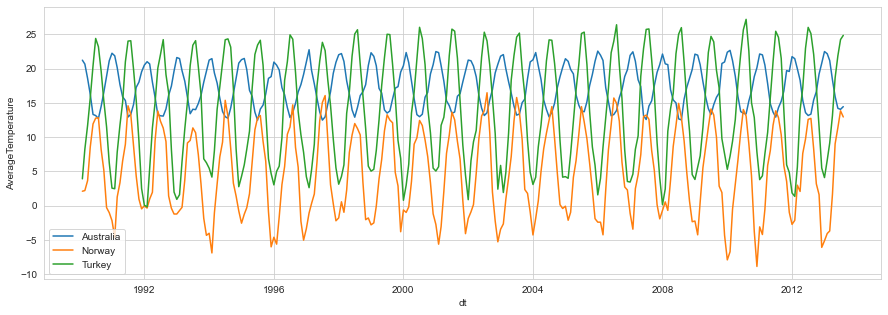

In [87]:
plt.figure(figsize=(15,5))
for ulke in data_means["Country"].unique():
    data = data_means[data_means["Country"]== ulke]
    sns.lineplot(x="dt", y="AverageTemperature", data=data)
plt.legend(data_means["Country"].unique())